In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data_url = 'https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv'
cancer = pd.read_csv(data_url)
cancer.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


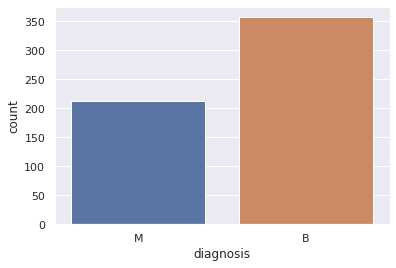

In [ ]:
sns.set(style="darkgrid")
sns.countplot(cancer['diagnosis'])
plt.show()

In [ ]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
cancer.drop(['Unnamed: 32'], axis = 1, inplace = True)

In [ ]:
cancer.drop(['id'], axis = 1, inplace = True)

In [ ]:
X = cancer.iloc[:, 1:].values
y = cancer['diagnosis'].values

In [ ]:
X.shape

(569, 30)

In [ ]:
y.shape

(569,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X_train,y_train)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
y_pred = lda.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

lda_cm = confusion_matrix(y_test, y_pred)
print(lda_cm)
lda_accuracy  = accuracy_score(y_test,y_pred)

print('LDA Accuracy:                ' + str(lda_accuracy))

lda_error = 1 - lda_accuracy
lda_f1 = 64 / (64 + (0.5 * (0 + 5)))


print("LDA Misclassification Rate: ", str(lda_error))
print("LDA F1 Score:               ", str(lda_f1))


[[103   1]
 [  5  62]]
LDA Accuracy:                0.9649122807017544
LDA Misclassification Rate:  0.03508771929824561
LDA F1 Score:                0.9624060150375939


              precision    recall  f1-score   support

           B       0.95      0.99      0.97       104
           M       0.98      0.93      0.95        67

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



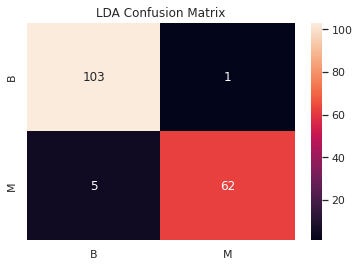

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))
ax = plt.axes()
sns.heatmap(lda_cm,annot=True,fmt="",xticklabels=["B","M"],yticklabels=["B","M"],ax = ax)

ax.set_title('LDA Confusion Matrix')
plt.show()


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
qda_pred = qda.predict(X_test)

In [ ]:
qda_cm = confusion_matrix(y_test, qda_pred)
qda_accuracy = accuracy_score(y_test,qda_pred)
qda_error = 1 - qda_accuracy
qda_f1 = 65 / 65 + (0.5 * (3 + 4))

print(qda_cm)
print("QDA Accuracy:               ", str(qda_accuracy))
print("QDA Misclassification Rate: ", str(qda_error))
print("QDA F1 Score:               ", str(qda_f1))

[[101   3]
 [  3  64]]
QDA Accuracy:                0.9649122807017544
QDA Misclassification Rate:  0.03508771929824561
QDA F1 Score:                4.5


              precision    recall  f1-score   support

           B       0.97      0.97      0.97       104
           M       0.96      0.96      0.96        67

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



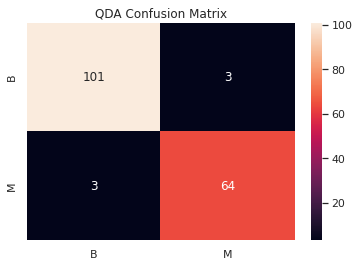

In [ ]:
print(classification_report(y_test,qda_pred))

ax = plt.axes()
sns.heatmap(qda_cm,annot=True,fmt="",xticklabels=["B","M"],yticklabels=["B","M"],ax = ax)
ax.set_title('QDA Confusion Matrix')
plt.show()
